The objective of this analysis is customer segmentation 

Customer segmentation: Customer segmentation is the problem of uncovering information about a firm’s customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and
patterns. We explore some of the ways in which this can be used.

The retail transactions based dataset is sourced from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/online+retail)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import datetime
import math

%matplotlib inline

In [2]:
df = pd.read_excel(r'Online Retail.xlsx')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

-> InvoiceNo: A unique identifier for the invoice. An invoice number shared across
rows means that those transactions were performed in a single invoice (multiple
purchases).

-> StockCode: Identifier for items contained in an invoice.

-> Description: Textual description of each of the stock item.

-> Quantity: The quantity of the item purchased.

-> InvoiceDate: Date of purchase.

-> UnitPrice: Value of each item.

-> CustomerID: Identifier for customer making the purchase.

-> Country: Country of customer.

### Rename Columns

In [4]:
df.columns =  map(str.lower, df.columns)

In [5]:
df.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Which are the top countries the retialer shipping its items to and how are the volumes of sales of those countries?

In [6]:
df['country'].value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: country, dtype: int64

This shows us that the bulk of ordering is taking place in its home country only which is not surprising. We
also notice the odd country name EIRE, which is a little concerning. But a quick web search indicates that it is just
an old name for Ireland

### How many unique customres retailer is having?

In [7]:
df['customerid'].nunique()

4372

Retialer has 4372 unique customers

### How the userbase of the firm is distributed? What percentage of order is made by top few customers of retailers?

In [8]:
(df['customerid'].value_counts()/sum(df['customerid'].value_counts())*100).head(n=14).cumsum()

17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
Name: customerid, dtype: float64

We have 4,372 unique customers but almost 10% of total sales are contributed by only 14 customers (based on the cumulative percentage aggregation in the preceding output).

### How many unique items firm is selling?

In [9]:
df['stockcode'].nunique()

4070

### Do we have description for all items?

In [10]:
df['description'].nunique()

4223

We have a mismatch in the number of StockCode and Description, as we can see that item descriptions are more than stock code values, which means that we have multiple descriptions for some of the stock codes. Although this is not going to interfere with our analysis, we would like to dig a little deeper in this to find out what may have caused this issue or what kind of duplicated descriptions are present in the data.

In [11]:
cat_df = df.groupby(["stockcode","description"]).count().reset_index()

In [12]:
cat_df.head()

stockcode                  description  invoiceno  quantity  invoicedate  \
0     10002  INFLATABLE POLITICAL GLOBE          71        71           71   
1     10080     GROOVY CACTUS INFLATABLE         22        22           22   
2     10080                        check          1         1            1   
3     10120                 DOGGY RUBBER         30        30           30   
4     10125      MINI FUNKY DESIGN TAPES         94        94           94   

   unitprice  customerid  country  
0         71          49       71  
1         22          21       22  
2          1           0        1  
3         30          30       30  
4         94          64       94

In [13]:
cat_des_df = df.groupby(["stockcode","description"]).count().reset_index()
cat_des_df.stockcode.value_counts()[cat_des_df.stockcode.value_counts()>1].reset_index().head()

index  stockcode
0   20713          8
1   23084          7
2   21830          6
3   85175          6
4  72807A          5

In [14]:
df[df['stockcode'] ==cat_des_df.stockcode.value_counts()[cat_des_df.stockcode.value_counts()>1].reset_index()['index'][6]]['description'].unique()

array(['JUMBO BAG VINTAGE CHRISTMAS ', 'came coded as 20713',
       'wrongly coded 20713', '20713 wrongly marked', 20713], dtype=object)

This gives the multiple descriptions for one of those items and we witness the simple ways in which
data quality can be corrupted in any dataset. A simple spelling mistake can end up in reducing data quality
and an erroneous analysis.

### Let's summarize quantity and price attributes

In [15]:
df['quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

In [16]:
df['unitprice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unitprice, dtype: float64

We can observe from the preceding output that both of these attributes are having negative values,
which may mean that we may have some return transactions in our data also. This scenario is quite common
for any retailer but we need to handle these before we proceed to our analysis.

### Data Cleaning

### Country based segmentations

In [17]:
# Separate data for one geography
df_uk = df[df['country'] == 'United Kingdom']

In [18]:
df_uk.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [19]:
# Find total amount earned from a particular customer
df_uk['amount'] = df_uk['quantity']*df_uk['unitprice']

C:\Users\krina\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df_uk['amount'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: amount, dtype: float64

In [21]:
#Remove negative amount values
df_uk = df_uk[~(df_uk.amount<0)]
df_uk.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [22]:
sum(df_uk['customerid'].isnull())

133275

In [23]:
df_uk = df_uk[~(df_uk['customerid'].isnull())]
df_uk.shape

(354345, 9)

### RFM - Recency , Frequency and Monetory Value for each customer

### Recency
To create the recency feature variable, we need to decide the reference date for our analysis. For our use case, we will define the reference date as one day after the last transaction in our dataset.

In [24]:
refrence_date = df_uk['invoicedate'].max()
refrence_date = refrence_date + datetime.timedelta(days = 1)
refrence_date

Timestamp('2011-12-10 12:49:00')

We will construct the recency variable as the number of days before the reference date when a customer
last made a purchase

In [25]:
df_uk['days_since_last_purchase'] = refrence_date - df_uk['invoicedate']
df_uk['days_since_last_purchase_num'] = df_uk['days_since_last_purchase'].astype('timedelta64[D]')

In [26]:
customer_history_df = df_uk.groupby("customerid").min().reset_index()[['customerid', 'days_since_last_purchase_num']]
customer_history_df.rename(columns={'days_since_last_purchase_num':'recency'},inplace=True)

In [27]:
customer_history_df.head()

customerid  recency
0     12346.0    326.0
1     12747.0      2.0
2     12748.0      1.0
3     12749.0      4.0
4     12820.0      3.0

In [28]:
import seaborn as sns

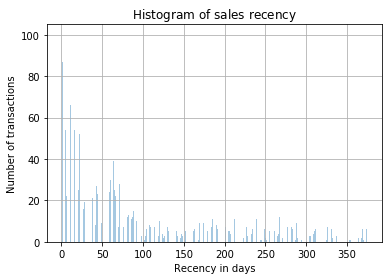

In [29]:
sns.distplot(customer_history_df['recency'],kde=False, bins=1000)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)

we have skewed distribution of sales recency with a much
higher number of frequent transactions and a fairly uniform number of less recent transactions.

### Frequency and Monetary Value

### Customer Monetory Value

In [30]:
customer_monetary_val = df_uk.groupby("customerid")['amount'].sum().reset_index()

In [31]:
customer_monetary_val.head()

customerid    amount
0     12346.0  77183.60
1     12747.0   4196.01
2     12748.0  33719.73
3     12749.0   4090.88
4     12820.0    942.34

In [32]:
customer_history_df = customer_history_df.merge(customer_monetary_val, how='outer')

In [33]:
customer_history_df.head()

customerid  recency    amount
0     12346.0    326.0  77183.60
1     12747.0      2.0   4196.01
2     12748.0      1.0  33719.73
3     12749.0      4.0   4090.88
4     12820.0      3.0    942.34

we will be transforming our values to
the log scale and presence of zeroes in our data may lead to an error. so let's add 0.001 to customer monetary value

In [34]:
customer_history_df['amount'] = customer_history_df['amount']+0.001

In [35]:
customer_history_df.head()

customerid  recency     amount
0     12346.0    326.0  77183.601
1     12747.0      2.0   4196.011
2     12748.0      1.0  33719.731
3     12749.0      4.0   4090.881
4     12820.0      3.0    942.341

### Frequency

In [36]:
customer_freq = df_uk.groupby("customerid")['amount'].count().reset_index()

In [37]:
customer_freq.head()

customerid  amount
0     12346.0       1
1     12747.0     103
2     12748.0    4596
3     12749.0     199
4     12820.0      59

In [38]:
customer_freq.rename(columns={'amount':'frequency'},inplace=True)

In [39]:
customer_freq.head()

customerid  frequency
0     12346.0          1
1     12747.0        103
2     12748.0       4596
3     12749.0        199
4     12820.0         59

In [40]:
customer_history_df = customer_history_df.merge(customer_freq, how='outer')

In [41]:
customer_history_df.head()

customerid  recency     amount  frequency
0     12346.0    326.0  77183.601          1
1     12747.0      2.0   4196.011        103
2     12748.0      1.0  33719.731       4596
3     12749.0      4.0   4090.881        199
4     12820.0      3.0    942.341         59

### Data PreProcessing

K-Means Clustering,  One of the requirements for proper functioning of the algorithm is the mean centering of the variable
values. Mean centering of a variable value means that we will replace the actual value of the variable with a
standardized value, so that the variable has a mean of 1 and variance of 0. This ensures that all the variables
are in the same range and the difference in ranges of values doesn’t cause the algorithm to not perform well.
This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This
problem is particularly noticeable for the monetary amount variable. To take care of this problem, we will
transform all the variables on the log scale. This transformation, along with the standardization, will ensure
that the input to our algorithm is a homogenous set of scaled and transformed values.

In [42]:
from sklearn import preprocessing

In [43]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']

In [44]:
X = customer_history_df[feature_vector].as_matrix()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

C:\Users\krina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [45]:
x = customer_history_df.amount_log

In [46]:
x.head()

0    11.253942
1     8.341890
2    10.425838
3     8.316516
4     6.848367
Name: amount_log, dtype: float64

C:\Users\krina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Probability')

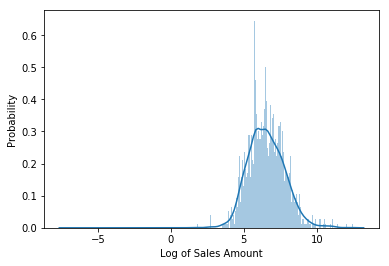

In [47]:
sns.distplot(x, bins=1000)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')

The resulting graph is a distribution resembling normal distribution with mean 0 and variance of 1

### Visualize Recency, Frequency, Monetization

Text(0.5, 0, 'Monetary')

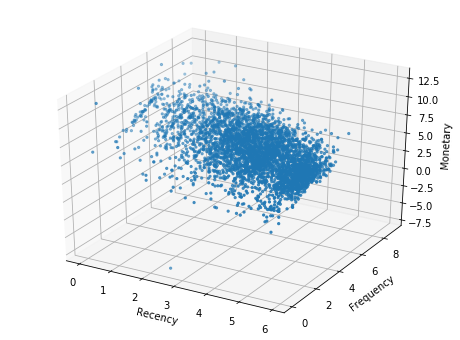

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

people who buy with a higher
frequency and more recency tend to spend more based on the increasing trend in Monetary value with a
corresponding increasing and decreasing trend for Frequency and Recency, respectively

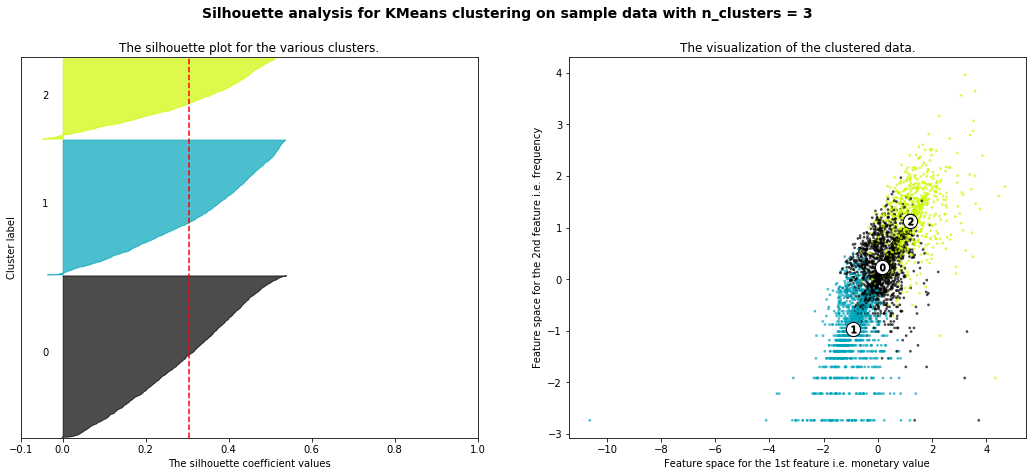

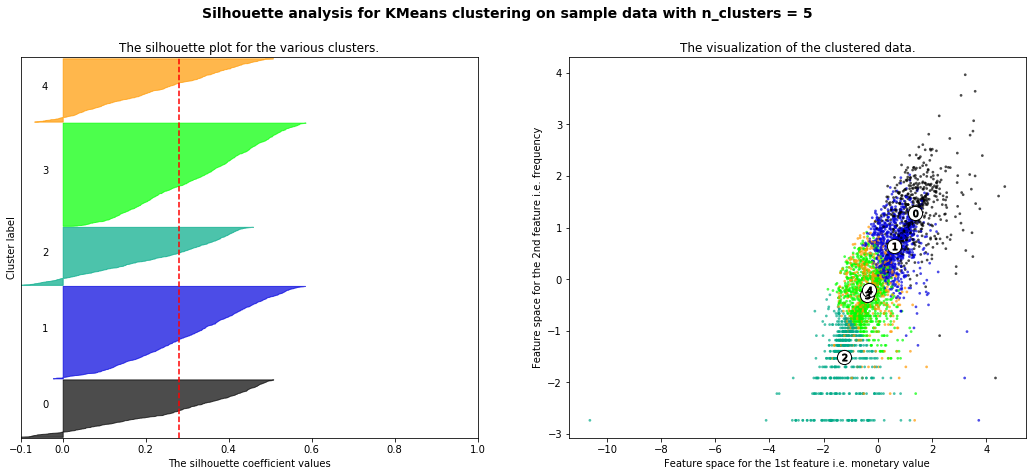

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]    
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_ 
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

In [50]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
    amount_log  recency_log  frequency_log
0   843.937271    44.083222      53.920633
1   221.236034   121.766072      10.668661
2  3159.294272     7.196647     177.789098
Silhouette score for cluster 3 is 0.30437444714898737

for 5 number of clusters
    amount_log  recency_log  frequency_log
0  3905.544371     5.627973     214.465989
1  1502.519606    46.880212      92.306262
2   142.867249   126.546751       5.147370
3   408.235418   139.056216      25.530424
4   464.371885    13.386419      29.581298
Silhouette score for cluster 5 is 0.27958641427323727



### 3 Cluster Configuration

• We get three clusters with stark differences in the Monetary value of the customer.

• Cluster 2 is the cluster of high value customer who shops frequently and is certainly
an important segment for each business.

• In the similar way we obtain customer groups with low and medium spends in
clusters with labels 1 and 0, respectively.

• Frequency and Recency correlate perfectly to the Monetary value based on the trend

### 5 Clusters Configuration

• Those who shop often and with high amount (represented by cluster 0).

• Those who have a decent spend but are not as frequent (represented by cluster 1).

### Find out the quality of difference in two clusters by labeling them

In [51]:
labels = cluster_centers[5]['labels']
customer_history_df['num_cluster5_labels'] = labels
labels = cluster_centers[3]['labels']
customer_history_df['num_cluster3_labels'] = labels

In [52]:
customer_history_df.head()

customerid  recency     amount  frequency  recency_log  frequency_log  \
0     12346.0    326.0  77183.601          1     5.786897       0.000000   
1     12747.0      2.0   4196.011        103     0.693147       4.634729   
2     12748.0      1.0  33719.731       4596     0.000000       8.432942   
3     12749.0      4.0   4090.881        199     1.386294       5.293305   
4     12820.0      3.0    942.341         59     1.098612       4.077537   

   amount_log  num_cluster5_labels  num_cluster3_labels  
0   11.253942                    1                    0  
1    8.341890                    0                    2  
2   10.425838                    0                    2  
3    8.316516                    0                    2  
4    6.848367                    4                    2

for the configuration of
five clusters and create boxplots that will show how the median, minimum, maximum, highest, and lowest
values are varying in the five groups. Note that we want to avoid the extremely high outlier values of each
group, as they will interfere in making a good observation (due to noise) around the central tendencies of
each cluster. So we will restrict the data such that only data points which are less than 0.8th percentile of the
cluster is used. This will give us good information about the majority of the users in that cluster segment.
The following code will help us create this plot for the total sales value.

### Visualise Segments

In [53]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'amount'
y0=customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1=customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2=customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3=customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4=customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []
for xd, yd, cls in zip(x_data, y_data, colors):
    traces.append(go.Box(
        y=yd, name=xd, boxpoints=False,
        jitter=0.5, whiskerwidth=0.2,
        fillcolor=cls, marker=dict(size=2,),
        line=dict(width=1), ))
layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True, showgrid=True,
        zeroline=True, dtick=1000,
        gridcolor='black', gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2, ),
        margin=dict(l=40,r=30, b=80, t=100, ),
        paper_bgcolor='white', plot_bgcolor='white', showlegend=False
        )
fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)

Let’s also take a look at the plot that is generated as a result of this code snippet. In Figure 8-7 we can see
that the Clusters 1 and 2 have a higher average sales amount, thus being the highest spenders. Although we
don’t see much difference in the sales values of Clusters 4 and 5, we do see a markedly smaller sales amount
in Cluster 3. This gives us an indication that we can merge the candidates of Clusters 4 and 5 together, at
least on the basis of sales amount

In [54]:
x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 80
field_to_plot = 'amount'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(        
        dtick=1000,
    )
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)
